# Metricas de los experimentos

**Autores**: 

José Antonio Ruiz Heredia (josrui05@ucm.es) 

Néstor Marín 

**Descripción**: 

En este código estudiamos las métricas de los distintos modelos experimentados

## 1. Experimentos

Primero importamos las librerias necesarias

In [1]:
import plotly.express as px
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Data_Paths_Model import *

Creamos una funcion para cargar los archivos .pkl

In [2]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        result = pickle.load(f)
    return result

Añadimos las rutas a los archivos .pkl

In [3]:
experiments = [exp_1_path, exp_2_path, exp_3_path, exp_4_path, exp_5_path]

Hacemos un diccionario de cada experimento

In [4]:
results = {}
for i,e in enumerate(experiments):
    results[f'exp_{i+1}'] = load_pickle(e) 
    
print(results)

{'exp_1': [{'epoch': 33, 'train_loss': 0.8383240442065506, 'val_loss': 0.6549050938076898, 'train_acc': 0.7332045435905457, 'val_acc': 0.7731044292449951, 'val_f1': 0.7779104113578796, 'train_f1': 0.7155958414077759}, {'epoch': 39, 'train_loss': 0.8220820300712294, 'val_loss': 0.667560282541447, 'train_acc': 0.7442942261695862, 'val_acc': 0.7613734006881714, 'val_f1': 0.767756462097168, 'train_f1': 0.7292701005935669}, {'epoch': 37, 'train_loss': 0.82564473326139, 'val_loss': 0.6783306492384871, 'train_acc': 0.7420946955680847, 'val_acc': 0.7550085783004761, 'val_f1': 0.7599073648452759, 'train_f1': 0.7279402613639832}, {'epoch': 46, 'train_loss': 0.8285611753454193, 'val_loss': 0.6551315305433617, 'train_acc': 0.739733874797821, 'val_acc': 0.7736119031906128, 'val_f1': 0.7837803363800049, 'train_f1': 0.7247630953788757}, {'epoch': 49, 'train_loss': 0.8184483509357778, 'val_loss': 0.6625723304854985, 'train_acc': 0.7405208349227905, 'val_acc': 0.766743004322052, 'val_f1': 0.77429807186

Representamos graficamente los experimentos segun su valor de ``val_f1``

In [5]:
# Definir un tono de azul más oscuro
custom_blue = '#1f77b4'  # Este es un tono de azul más oscuro
# Definir el color destacado
highlight_color = '#ee5c13'  # Por ejemplo, un tono de naranja

# Crear un DataFrame con los valores de val_f1 de cada variable
data = []
variables = results.keys()

for i, variable in enumerate(variables):
  experiment_data = results[variable] 
  for j, epoch_data in enumerate(experiment_data):
    data.append({'Experimentos': f'Exp. {i+1}', 'Época': j+1, 'F1-score': epoch_data['val_f1']})
    
df_val_f1 = pd.DataFrame(data)


# Crear el diagrama de cajas con el tono de azul más oscuro 
fig = px.box(df_val_f1, x='Experimentos', y='F1-score', color='Experimentos', 
             color_discrete_map={'Exp. 1': custom_blue, 'Exp. 2': custom_blue, 'Exp. 3': highlight_color, 
                                 'Exp. 4': custom_blue, 'Exp. 5': custom_blue}, width=800, height=600)

# Mostrar el gráfico
fig.show()

Métricas de los experimentos

In [6]:
# Lista para almacenar las métricas de todos los experimentos
metrics_all_experiments = []

# Iterar sobre los resultados de cada experimento
for experiment, data in results.items():
    # Extraer las métricas de cada experimento
    val_accuracy = [epoch_data['val_acc'] for epoch_data in data]
    val_f1_score = [epoch_data['val_f1'] for epoch_data in data]
    val_loss = [epoch_data['val_loss'] for epoch_data in data]
    train_accuracy = [epoch_data['train_acc'] for epoch_data in data]
    train_f1_score = [epoch_data['train_f1'] for epoch_data in data]
    
    # Calcular la media de cada métrica y agregarla a la lista
    median_val_accuracy = np.median(val_accuracy)
    median_val_f1_score = np.median(val_f1_score)
    median_val_loss = np.median(val_loss)
    median_train_accuracy = np.median(train_accuracy)
    median_train_f1_score = np.median(train_f1_score)
    
    metrics_all_experiments.append({
        'Experiment': experiment,
        'F1-score val': median_val_f1_score,
        'F1-score train': median_train_f1_score,
        'Accuracy val': median_val_accuracy,
        'Accuracy train': median_train_accuracy,
        'Loss': median_val_loss
    })

# Crear un DataFrame con las métricas de todos los experimentos
df_metrics = pd.DataFrame(metrics_all_experiments)

# Mostrar la tabla de métricas
print(df_metrics)

  Experiment  F1-score val  F1-score train  Accuracy val  Accuracy train  \
0      exp_1      0.774298        0.727511      0.766743        0.740521   
1      exp_2      0.891309        0.996696      0.868097        0.996494   
2      exp_3      0.894172        0.889953      0.866915        0.901767   
3      exp_4      0.876129        0.900483      0.855466        0.923088   
4      exp_5      0.820983        0.670051      0.775615        0.669171   

       Loss  
0  0.662572  
1  0.555834  
2  0.525168  
3  0.546138  
4  0.664141  


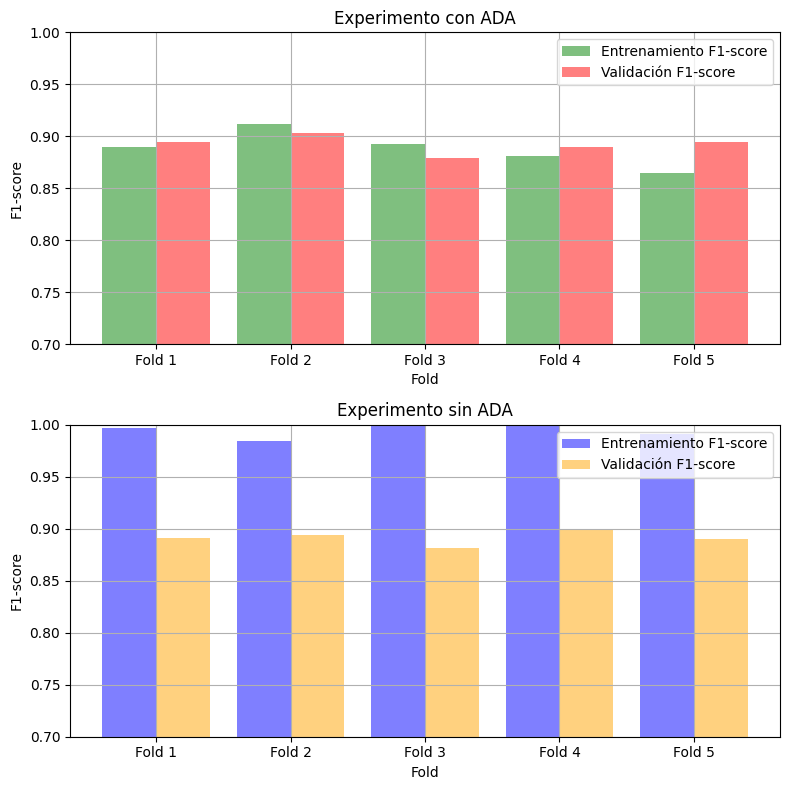

In [7]:
# Datos del experimento exp_3
exp_3_data = results['exp_3']
epochs_3 = [entry['epoch'] for entry in exp_3_data]
train_f1_3 = [entry['train_f1'] for entry in exp_3_data]
val_f1_3 = [entry['val_f1'] for entry in exp_3_data]

# Datos del experimento exp_2
exp_2_data = results['exp_2']
epochs_2 = [entry['epoch'] for entry in exp_2_data]
train_f1_2 = [entry['train_f1'] for entry in exp_2_data]
val_f1_2 = [entry['val_f1'] for entry in exp_2_data]

# Crear las subgráficas
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Gráfica para exp_3
axes[0].bar(np.arange(len(epochs_3)) - 0.2, train_f1_3, width=0.4, label='Entrenamiento F1-score', alpha=0.5, color='green')
axes[0].bar(np.arange(len(epochs_3)) + 0.2, val_f1_3, width=0.4, label='Validación F1-score', alpha=0.5, color='red')
axes[0].set_title('Experimento con ADA')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('F1-score')
axes[0].set_xticks(np.arange(len(epochs_3)))
axes[0].set_xticklabels([f"Fold {i+1}" for i in range(len(epochs_3))])
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(bottom=0.7, top=1) 


# Gráfica para exp_2
axes[1].bar(np.arange(len(epochs_2)) - 0.2, train_f1_2, width=0.4, label='Entrenamiento F1-score', alpha=0.5, color='blue')
axes[1].bar(np.arange(len(epochs_2)) + 0.2, val_f1_2, width=0.4, label='Validación F1-score', alpha=0.5, color='orange')
axes[1].set_title('Experimento sin ADA')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('F1-score')
axes[1].set_xticks(np.arange(len(epochs_2)))
axes[1].set_xticklabels([f"Fold {i+1}" for i in range(len(epochs_2))])
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(bottom=0.7, top=1) 

plt.tight_layout()
plt.show()

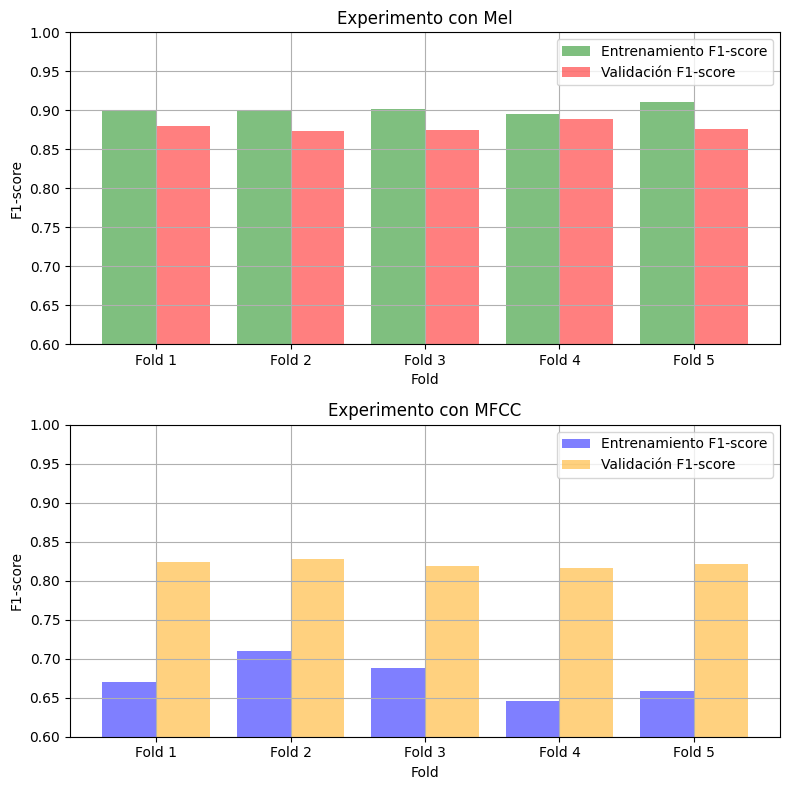

In [8]:
# Datos del experimento exp_4
exp_4_data = results['exp_4']
epochs_4 = [entry['epoch'] for entry in exp_4_data]
train_f1_4 = [entry['train_f1'] for entry in exp_4_data]
val_f1_4 = [entry['val_f1'] for entry in exp_4_data]

# Datos del experimento exp_5
exp_5_data = results['exp_5']
epochs_5 = [entry['epoch'] for entry in exp_5_data]
train_f1_5 = [entry['train_f1'] for entry in exp_5_data]
val_f1_5 = [entry['val_f1'] for entry in exp_5_data]

# Crear las subgráficas
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Gráfica para exp_3
axes[0].bar(np.arange(len(epochs_4)) - 0.2, train_f1_4, width=0.4, label='Entrenamiento F1-score', alpha=0.5, color='green')
axes[0].bar(np.arange(len(epochs_4)) + 0.2, val_f1_4, width=0.4, label='Validación F1-score', alpha=0.5, color='red')
axes[0].set_title('Experimento con Mel')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('F1-score')
axes[0].set_xticks(np.arange(len(epochs_4)))
axes[0].set_xticklabels([f"Fold {i+1}" for i in range(len(epochs_4))])
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(bottom=0.6, top=1) 


# Gráfica para exp_2
axes[1].bar(np.arange(len(epochs_5)) - 0.2, train_f1_5, width=0.4, label='Entrenamiento F1-score', alpha=0.5, color='blue')
axes[1].bar(np.arange(len(epochs_5)) + 0.2, val_f1_5, width=0.4, label='Validación F1-score', alpha=0.5, color='orange')
axes[1].set_title('Experimento con MFCC')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('F1-score')
axes[1].set_xticks(np.arange(len(epochs_5)))
axes[1].set_xticklabels([f"Fold {i+1}" for i in range(len(epochs_5))])
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(bottom=0.6, top=1) 

plt.tight_layout()
plt.show()


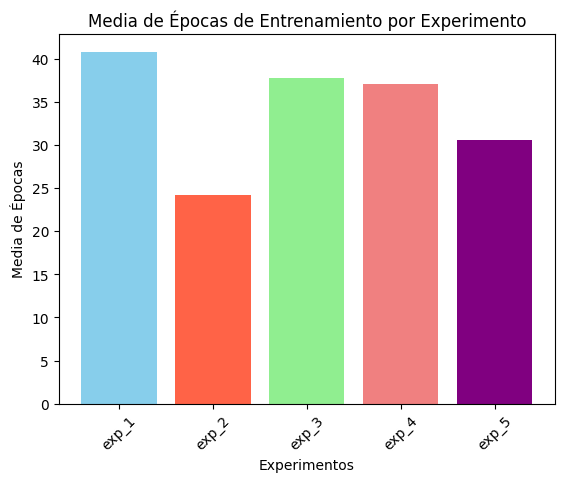

In [9]:
# Asumiendo que 'results' es un diccionario con los resultados de tus experimentos
exp_1_data = results['exp_1']
exp_2_data = results['exp_2']
exp_3_data = results['exp_3']
exp_4_data = results['exp_4']
exp_5_data = results['exp_5']

# Extraer las épocas para cada experimento
epochs_1 = [entry['epoch'] for entry in exp_1_data]
epochs_2 = [entry['epoch'] for entry in exp_2_data]
epochs_3 = [entry['epoch'] for entry in exp_3_data]
epochs_4 = [entry['epoch'] for entry in exp_4_data]
epochs_5 = [entry['epoch'] for entry in exp_5_data]

# Calcular la media de las épocas para cada experimento
media_epochs_1 = sum(epochs_1) / len(epochs_1)
media_epochs_2 = sum(epochs_2) / len(epochs_2)
media_epochs_3 = sum(epochs_3) / len(epochs_3)
media_epochs_4 = sum(epochs_4) / len(epochs_4)
media_epochs_5 = sum(epochs_5) / len(epochs_5)

# Crear una lista con los nombres de los experimentos
experimentos = ['exp_1', 'exp_2', 'exp_3', 'exp_4', 'exp_5']

# Crear una lista con las medias de épocas para cada experimento
medias_epocas = [media_epochs_1, media_epochs_2, media_epochs_3, media_epochs_4, media_epochs_5]

# Importar matplotlib para el gráfico
import matplotlib.pyplot as plt

# Definir una lista de colores  
colores = ['skyblue', 'tomato', 'lightgreen', 'lightcoral', 'purple']

# Crear el gráfico con colores específicos para cada barra
plt.bar(experimentos, medias_epocas, color=colores)
plt.xlabel('Experimentos')
plt.ylabel('Media de Épocas')
plt.title('Media de Épocas de Entrenamiento por Experimento')
plt.xticks(rotation=45)  
plt.show()
